In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import pyplot as plt

# Data

In [2]:
N_design   = 18000     #RPM
D1_model   = 0.5       #meter
T_a_model  = 30+273.15 #kelvin
P_a_model  = 100       #kPa
gama_air   = 1.4
R_air      = 287       #j/kg-k
gama_argon = 1.66
R_argon    = 208       #j/kg-k

In [3]:
Data = np.array(pd.read_excel("Data.xlsx", engine='openpyxl'))

In [4]:
cols1 = pd.MultiIndex.from_product([
    [u'40%', u'60%', u'80%', u'100%', u'110%'],
    [u'Mass flow rate[kg/s]', u'Efficiency'],
])

In [5]:
Efficiency_model = pd.DataFrame(Data[0:7], index=range(1,8), columns=cols1)

In [6]:
cols2 = pd.MultiIndex.from_product([
    [u'40%', u'60%', u'80%', u'100%', u'110%'],
    [u'Mass flow rate[kg/s]', u'Pressure ratio'],
])

In [7]:
PR_model = pd.DataFrame(Data[16:23], index=range(1,8), columns=cols2)

# Part 1

## Conditions

In [8]:
T_a    = 15+273.15   #kelvin
P_a    = 101         #kPa
T01_m  = T_a_model
P01_m  = P_a_model
R_m    = R_air
gama_m = gama_air
D1_p   = D1_model
P01_p  = P_a
T01_p  = T_a
gama_p = gama_air
R_p    = R_air
N_m    = np.array([40, 60, 80, 100, 110])

In [9]:
def data_generator(Efficiency_model, PR_model, gama_p, gama_m, P01_p, T01_p, P01_m, T01_m, R_p, R_m, D1_p, D1_model, N_m ):
    
    Cp_m = gama_m*R_m/(gama_m-1)
    Cp_p = gama_p*R_p/(gama_p-1)
    gama_ratio = gama_p/gama_m
    P0_ratio = P01_p/P01_m
    T0_ratio = T01_p/T01_m
    R_ratio = R_p/R_m
    A_ratio = (D1_p/D1_model)**2
    D_ratio = (D1_p/D1_model)
    N_correction = ((gama_ratio*R_ratio*T0_ratio)**0.5)*D_ratio
    dh0_correction = gama_ratio*R_ratio*T0_ratio
    m_dot_correction = (gama_ratio)*(P0_ratio)*(A_ratio)\
                  /((gama_ratio*R_ratio*T0_ratio)**0.5)

    N_p = N_m*N_correction
    Counter = [0, 0, 1, 1, 2, 2, 3, 3, 4, 4]
    counter = 0
    
    for column, S in PR_model.items():
        s = np.array(S)
        new_column = (f'{N_p[Counter[counter]]:.4}%',column[1])
         
        if str(column[1])=='Mass flow rate[kg/s]':
            
            if counter == 0:
                PR_prototype = pd.DataFrame(s*m_dot_correction, index=range(1,8),\
                                            columns=pd.MultiIndex.from_product([
                    [new_column[0]],[column[1]]
                ]))
                
            else:
                PR_prototype[new_column] = s*m_dot_correction
                
        else:
            dh0s_m = Cp_m*T01_m*(s**((gama_m-1)/gama_m)-1)
            dh0s_p = dh0_correction*dh0s_m
            PR_prototype[new_column] = (dh0s_p/(Cp_p*T01_p)+1)**(gama_p/(gama_p-1))
            
        counter += 1
        
    counter = 0
    
    for column, S in Efficiency_model.items():
        s = np.array(S)
        new_column = (f'{N_p[Counter[counter]]:.4}%',column[1])
         
        if str(column[1])=='Mass flow rate[kg/s]':
            
            if counter == 0:
                Efficiency_prototype = pd.DataFrame(s*m_dot_correction, index=range(1,8),\
                                            columns=pd.MultiIndex.from_product([
                    [new_column[0]],[column[1]]
                ]))
                
            else:
                Efficiency_prototype[new_column] = s*m_dot_correction
                
        else:
            Efficiency_prototype[new_column] = s
            
        counter += 1
        
    return Efficiency_prototype ,PR_prototype

In [10]:
Efficiency_prototype1 ,PR_prototype1 = data_generator(
    Efficiency_model, PR_model, gama_p, gama_m, P01_p, T01_p, P01_m, T01_m, R_p, R_m, D1_p, D1_model, N_m
)

In [11]:
Efficiency_prototype1

39.0%                           58.5%             \
  Mass flow rate[kg/s] Efficiency Mass flow rate[kg/s] Efficiency   
1             5.847390   0.766144             6.851115   0.799060   
2             6.178895   0.777900             7.237872   0.813636   
3             6.491984   0.778840             7.578586   0.815987   
4             6.759030   0.761912             7.882466   0.802351   
5             6.952408   0.722884             8.121886   0.766614   
6             7.090536   0.665047             8.260014   0.706426   
7             7.127370   0.641536             8.306056   0.667868   

                 78.0%                          97.49%             \
  Mass flow rate[kg/s] Efficiency Mass flow rate[kg/s] Efficiency   
1             7.919300   0.814107             9.042735   0.808934   
2             8.352099   0.832445             9.475534   0.827273   
3             8.738855   0.841379             9.871499   0.841379   
4             9.088778   0.831034            10.193796   0.847962   
5             9.337407   0.797649            10.470051   0.834796   
6             9.512368   0.738871            10.626595   0.779781   
7             9.576828   0.682915            10.672638   0.713950   

                107.2%             
  Mass flow rate[kg/s] Efficiency  
1            10.479259   0.794828  
2            10.700263   0.807994  
3            10.884433   0.815047  
4            11.040977   0.818339  
5            11.160687   0.815987  
6            11.243564   0.789655  
7            11.261981   0.742163

In [12]:
PR_prototype1

39.0%                               58.5%                 \
  Mass flow rate[kg/s] Pressure ratio Mass flow rate[kg/s] Pressure ratio   
1             5.836295       4.638404             6.844791       6.074813   
2             6.165804       4.615960             7.204255       6.164589   
3             6.485327       4.436409             7.563719       6.029925   
4             6.744940       4.054863             7.883242       5.558603   
5             6.934657       3.471322             8.112900       4.817955   
6             7.074449       2.932668             8.262676       3.785536   
7             7.134359       2.685786             8.312602       3.359102   

                 78.0%                              97.49%                 \
  Mass flow rate[kg/s] Pressure ratio Mass flow rate[kg/s] Pressure ratio   
1             7.923183       7.847880             9.041515       9.665835   
2             8.342557       8.049875             9.470874      10.024938   
3             8.741962       8.049875             9.850309      10.294264   
4             9.081455       7.578554            10.199787      10.249377   
5             9.351053       6.568579            10.459400       9.620948   
6             9.520800       5.087282            10.619162       7.713217   
7             9.570725       4.077307            10.679072       5.715711   

                107.2%                 
  Mass flow rate[kg/s] Pressure ratio  
1            10.499340      11.573566  
2            10.689058      12.134663  
3            10.888760      12.314214  
4            11.038536      12.359102  
5            11.158358      12.089776  
6            11.248224      10.810474  
7            11.268194       8.857855

In [13]:
def plt_func(Efficiency ,PR):
    
    fig = plt.figure(figsize=(20, 8))
    
    plt.subplot(1, 2, 1)
    Counter = [0, 0, 1, 1, 2, 2, 3, 3, 4, 4]
    counter = 0
    
    for column, S in Efficiency.items():
        
        s = np.array(S)
        
        if counter%2 ==0:
            
            X1 = np.array(s)
            
        else:
            
            Y1 = np.array(s)
            plt.plot(X1, Y1, marker = "o", linestyle = "solid", label=f'N = {column[0]}')
            plt.xlabel('Mass flow rate[kg/s]')
            plt.ylabel('Efficiency')
            plt.legend()
            
        counter += 1
        
    plt.subplot(1, 2, 2)
            
    for column, S in PR.items():
        
        s = np.array(S)
        
        if counter%2 ==0:
            
            X2 = np.array(s)
            
        else:
            
            Y2 = np.array(s)
            plt.plot(X2, Y2, marker = "o", linestyle = "solid", label=f'N = {column[0]}')
            plt.xlabel('Mass flow rate[kg/s]')
            plt.ylabel('Pressure ratio')
            plt.legend()
            
        counter += 1
    
    

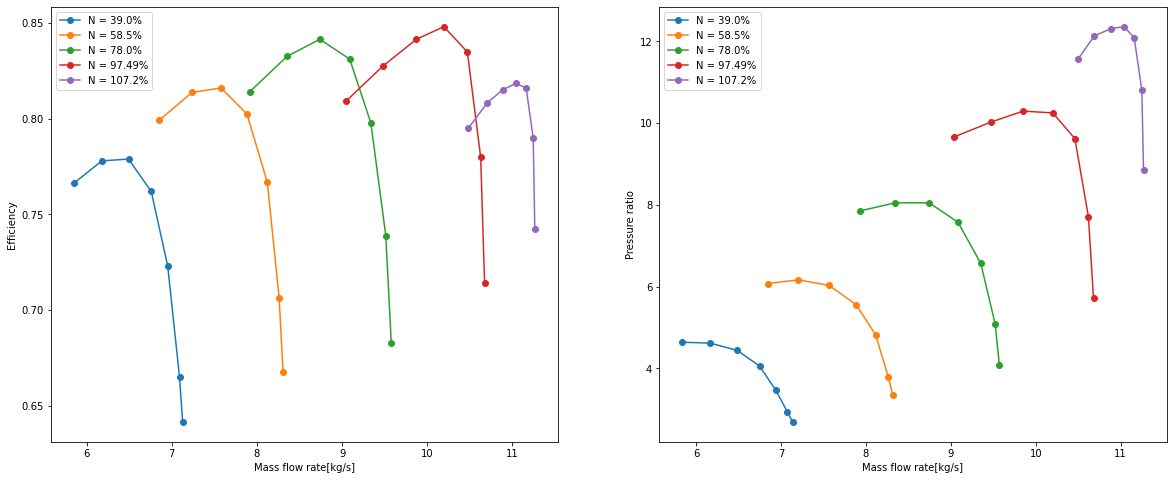

In [14]:
plt_func(Efficiency_prototype1 ,PR_prototype1)

# Part 2

## Conditions

In [15]:
T_a    = 15+273.15   #kelvin
P_a    = 101         #kPa
D1_p   = 0.8         #meter
P01_p  = P_a
T01_p  = T_a
gama_p = gama_air
R_p    = R_air

In [16]:
Efficiency_prototype2 ,PR_prototype2 = data_generator(
    Efficiency_model, PR_model, gama_p, gama_m, P01_p, T01_p, P01_m, T01_m, R_p, R_m, D1_p, D1_model, N_m
)

In [17]:
Efficiency_prototype2

62.4%                          93.59%             \
  Mass flow rate[kg/s] Efficiency Mass flow rate[kg/s] Efficiency   
1            14.969318   0.766144            17.538855   0.799060   
2            15.817972   0.777900            18.528951   0.813636   
3            16.619479   0.778840            19.401179   0.815987   
4            17.303117   0.761912            20.179112   0.802351   
5            17.798166   0.722884            20.792029   0.766614   
6            18.151772   0.665047            21.145635   0.706426   
7            18.246066   0.641536            21.263504   0.667868   

                124.8%                          156.0%             \
  Mass flow rate[kg/s] Efficiency Mass flow rate[kg/s] Efficiency   
1            20.273407   0.814107            23.149402   0.808934   
2            21.381372   0.832445            24.257367   0.827273   
3            22.371469   0.841379            25.271038   0.841379   
4            23.267271   0.831034            26.096118   0.847962   
5            23.903761   0.797649            26.803330   0.834796   
6            24.351662   0.738871            27.204084   0.779781   
7            24.516678   0.682915            27.321952   0.713950   

                171.6%             
  Mass flow rate[kg/s] Efficiency  
1            26.826904   0.794828  
2            27.392673   0.807994  
3            27.864148   0.815047  
4            28.264901   0.818339  
5            28.571360   0.815987  
6            28.783523   0.789655  
7            28.830671   0.742163

In [18]:
PR_prototype2

62.4%                              93.59%                 \
  Mass flow rate[kg/s] Pressure ratio Mass flow rate[kg/s] Pressure ratio   
1            14.940916       4.638404            17.522665       6.074813   
2            15.784458       4.615960            18.442893       6.164589   
3            16.602438       4.436409            19.363120       6.029925   
4            17.267047       4.054863            20.181100       5.558603   
5            17.752722       3.471322            20.769023       4.817955   
6            18.110588       2.932668            21.152452       3.785536   
7            18.263960       2.685786            21.280261       3.359102   

                124.8%                              156.0%                 \
  Mass flow rate[kg/s] Pressure ratio Mass flow rate[kg/s] Pressure ratio   
1            20.283348       7.847880            23.146278       9.665835   
2            21.356947       8.049875            24.245439      10.024938   
3            22.379422       8.049875            25.216790      10.294264   
4            23.248525       7.578554            26.111455      10.249377   
5            23.938696       6.568579            26.776064       9.620948   
6            24.373248       5.087282            27.185054       7.713217   
7            24.501057       4.077307            27.338425       5.715711   

                171.6%                 
  Mass flow rate[kg/s] Pressure ratio  
1            26.878312      11.573566  
2            27.363987      12.134663  
3            27.875225      12.314214  
4            28.258653      12.359102  
5            28.565395      12.089776  
6            28.795452      10.810474  
7            28.846576       8.857855

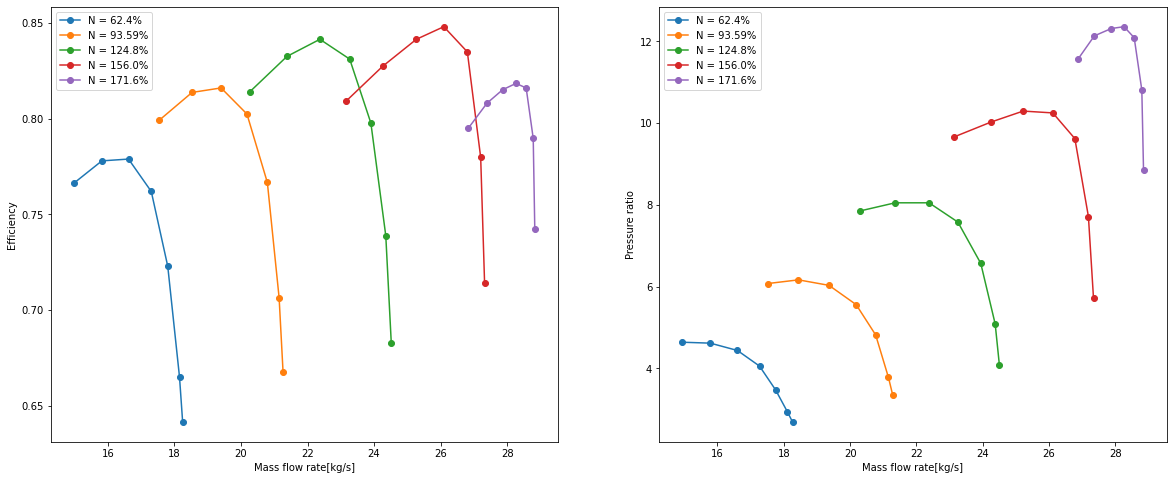

In [19]:
plt_func(Efficiency_prototype2 ,PR_prototype2)

# Part 3

## Conditions

In [20]:
T_a    = 25+273.15   #kelvin
P_a    = 2*101.325   #kPa
D1_p   = D1_model    #meter
P01_p  = P_a
T01_p  = T_a
gama_p = gama_argon
R_p    = R_argon

In [21]:
Efficiency_prototype3 ,PR_prototype3 = data_generator(
    Efficiency_model, PR_model, gama_p, gama_m, P01_p, T01_p, P01_m, T01_m, R_p, R_m, D1_p, D1_model, N_m
)

In [22]:
Efficiency_prototype3

36.77%                          55.16%             \
  Mass flow rate[kg/s] Efficiency Mass flow rate[kg/s] Efficiency   
1            14.752937   0.766144            17.285331   0.799060   
2            15.589324   0.777900            18.261116   0.813636   
3            16.379245   0.778840            19.120736   0.815987   
4            17.053002   0.761912            19.887424   0.802351   
5            17.540894   0.722884            20.491481   0.766614   
6            17.889389   0.665047            20.839976   0.706426   
7            17.982320   0.641536            20.956141   0.667868   

                73.55%                          91.93%             \
  Mass flow rate[kg/s] Efficiency Mass flow rate[kg/s] Efficiency   
1            19.980356   0.814107            22.814779   0.808934   
2            21.072306   0.832445            23.906728   0.827273   
3            22.048091   0.841379            24.905746   0.841379   
4            22.930944   0.831034            25.718900   0.847962   
5            23.558234   0.797649            26.415889   0.834796   
6            23.999660   0.738871            26.810850   0.779781   
7            24.162291   0.682915            26.927015   0.713950   

                101.1%             
  Mass flow rate[kg/s] Efficiency  
1            26.439122   0.794828  
2            26.996714   0.807994  
3            27.461373   0.815047  
4            27.856334   0.818339  
5            28.158362   0.815987  
6            28.367459   0.789655  
7            28.413925   0.742163

In [23]:
PR_prototype3

36.77%                              55.16%                 \
  Mass flow rate[kg/s] Pressure ratio Mass flow rate[kg/s] Pressure ratio   
1            14.724946       5.077043            17.269376       6.562533   
2            15.556294       5.053367            18.176302       6.653568   
3            16.362450       4.863401            19.083227       6.516941   
4            17.017452       4.456324            19.889384       6.035131   
5            17.496108       3.824234            20.468808       5.265904   
6            17.848801       3.229714            20.846694       4.166068   
7            17.999955       2.953420            20.972656       3.701283   

                73.55%                              91.93%                 \
  Mass flow rate[kg/s] Pressure ratio Mass flow rate[kg/s] Pressure ratio   
1            19.990153       8.326302            22.811700      10.069396   
2            21.048233       8.523005            23.894972      10.406935   
3            22.055928       8.523005            24.852282      10.658737   
4            22.912469       8.062763            25.734016      10.616849   
5            23.592663       7.060819            26.389017      10.027056   
6            24.020934       5.547411            26.792096       8.194716   
7            24.146896       4.480401            26.943250       6.196371   

                101.1%                 
  Mass flow rate[kg/s] Pressure ratio  
1            26.489787      11.839844  
2            26.968442      12.350542  
3            27.472290      12.513072  
4            27.850175      12.553639  
5            28.152484      12.309842  
6            28.379215      11.138228  
7            28.429600       9.302040

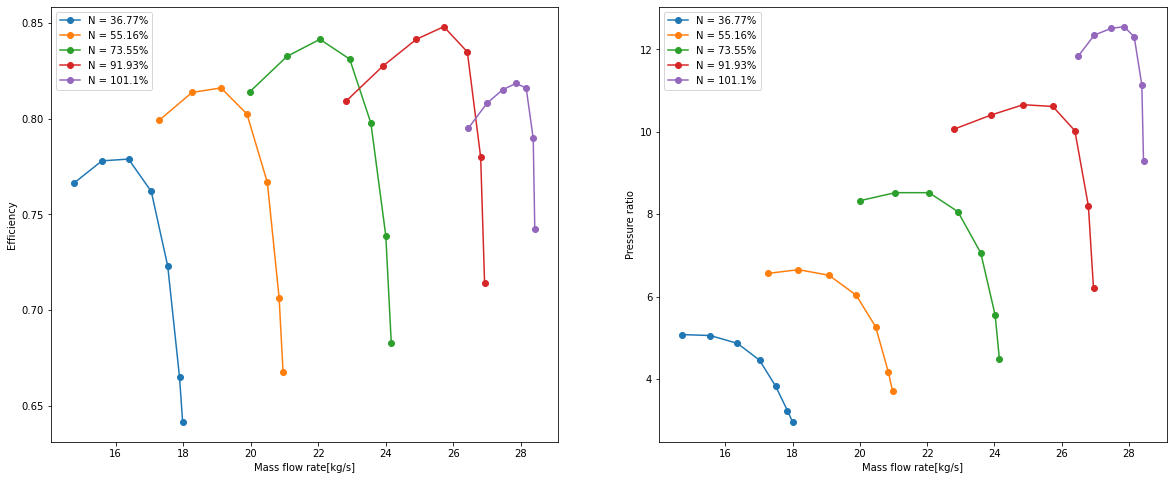

In [24]:
plt_func(Efficiency_prototype3 ,PR_prototype3)

# Part 4

## Conditions

In [25]:
T_a    = 25+273.15   #kelvin
P_a    = 2*101.325   #kPa
D1_p   = 0.8         #meter
P01_p  = P_a
T01_p  = T_a
gama_p = gama_argon
R_p    = R_argon

In [26]:
Efficiency_prototype4 ,PR_prototype4 = data_generator(
    Efficiency_model, PR_model, gama_p, gama_m, P01_p, T01_p, P01_m, T01_m, R_p, R_m, D1_p, D1_model, N_m
)

In [27]:
Efficiency_prototype4

58.84%                          88.26%             \
  Mass flow rate[kg/s] Efficiency Mass flow rate[kg/s] Efficiency   
1            37.767520   0.766144            44.250448   0.799060   
2            39.908670   0.777900            46.748457   0.813636   
3            41.930868   0.778840            48.949084   0.815987   
4            43.655684   0.761912            50.911806   0.802351   
5            44.904689   0.722884            52.458193   0.766614   
6            45.796835   0.665047            53.350339   0.706426   
7            46.034740   0.641536            53.647721   0.667868   

                117.7%                          147.1%             \
  Mass flow rate[kg/s] Efficiency Mass flow rate[kg/s] Efficiency   
1            51.149712   0.814107            58.405833   0.808934   
2            53.945103   0.832445            61.201225   0.827273   
3            56.443112   0.841379            63.758710   0.841379   
4            58.703215   0.831034            65.840384   0.847962   
5            60.309078   0.797649            67.624677   0.834796   
6            61.439130   0.738871            68.635776   0.779781   
7            61.855465   0.682915            68.933158   0.713950   

                161.8%             
  Mass flow rate[kg/s] Efficiency  
1            67.684153   0.794828  
2            69.111587   0.807994  
3            70.301115   0.815047  
4            71.312214   0.818339  
5            72.085407   0.815987  
6            72.620695   0.789655  
7            72.739648   0.742163

In [29]:
PR_prototype4

58.84%                              88.26%                 \
  Mass flow rate[kg/s] Pressure ratio Mass flow rate[kg/s] Pressure ratio   
1            37.695861       5.077043            44.209603       6.562533   
2            39.824113       5.053367            46.531333       6.653568   
3            41.887873       4.863401            48.853062       6.516941   
4            43.564678       4.456324            50.916822       6.035131   
5            44.790035       3.824234            52.400149       5.265904   
6            45.692930       3.229714            53.367537       4.166068   
7            46.079885       2.953420            53.689999       3.701283   

                117.7%                              147.1%                 \
  Mass flow rate[kg/s] Pressure ratio Mass flow rate[kg/s] Pressure ratio   
1            51.174792       8.326302            58.397951      10.069396   
2            53.883477       8.523005            61.171128      10.406935   
3            56.463176       8.523005            63.621843      10.658737   
4            58.655921       8.062763            65.879080      10.616849   
5            60.397218       7.060819            67.555885      10.027056   
6            61.493591       5.547411            68.587765       8.194716   
7            61.816053       4.480401            68.974720       6.196371   

                161.8%                 
  Mass flow rate[kg/s] Pressure ratio  
1            67.813855      11.839844  
2            69.039212      12.350542  
3            70.329062      12.513072  
4            71.296449      12.553639  
5            72.070359      12.309842  
6            72.650792      11.138228  
7            72.779777       9.302040

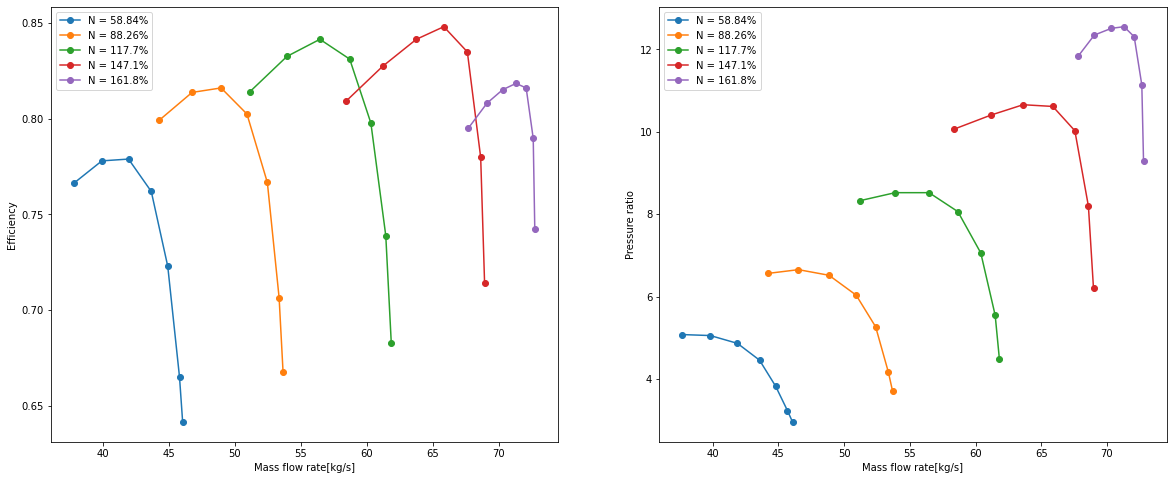

In [30]:
plt_func(Efficiency_prototype4 ,PR_prototype4)